### Project 3: Scikitlearn Logistic Regression
#### Montgomery College DATA201 Spring 2019  [Steve Dutky](sdutky@gmail.com)
The third project is on Logistic Regression
 The target/label variable is discrete/qualitative and could be binary or multi-class. Choose a suitable dataset. The main goal of this project is to use the Scikitlearn Logisitic Regression, split the data into training and testing data, check the accuracy (confusion matrix / AuC).

#### python/jupyter initialization:

In [90]:
## import packages:
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import seaborn as sns
from scipy import stats #  library of statistical functions
import sklearn #

#
# Set seed for generating psuedo random numbers
np.random.seed(12345678)
#
# Set up graphics
plt.style.use('classic')
%matplotlib inline

In [91]:
ncdData=pd.read_csv("https://raw.githubusercontent.com/sdutky/mcData201/master/project3sources/sdutkyMcData201ncdData.csv")
ncdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
title        266 non-null object
countNcd     266 non-null int64
meanNcd      266 non-null float64
stdNcd       266 non-null float64
medianNcd    266 non-null float64
class        266 non-null object
isPerl       266 non-null bool
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 12.8+ KB


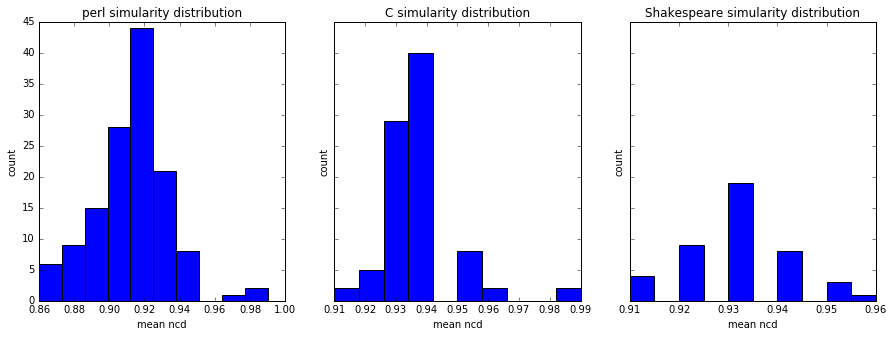

In [92]:
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3,sharey=True, sharex=False,figsize=(15,5))
ax0.hist(ncdData.meanNcd[ncdData['class']=='perl'])
ax0.set_ylabel('count')
ax0.set_xlabel('mean ncd')
ax0.set_title('perl simularity distribution')

ax1.hist(ncdData.meanNcd[ncdData['class']=='c'])
ax1.set_ylabel('count')
ax1.set_xlabel('mean ncd')
ax1.set_title('C simularity distribution')
                         
ax2.hist(ncdData.meanNcd[ncdData['class']=='shakespeare'])
ax2.set_ylabel('count')
ax2.set_xlabel('mean ncd')
ax2.set_title('Shakespeare simularity distribution')
                         
plt.show()

In [103]:
from sklearn.model_selection import train_test_split
predictors=ncdData[["meanNcd"]]
target=ncdData[["isPerl"]]

Xtrain, Xtest, yTrain, yTest = train_test_split( predictors, target, test_size=0.25, random_state=9)

In [104]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(Xtrain,yTrain.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
logistic.score(Xtest, yTest.values.ravel() )

0.417910447761194

In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yTest, logistic.predict(Xtest)))
df=yTest.copy()
df['predict']=logistic.predict(Xtest)
print(df.describe())

[[ 0 39]
 [ 0 28]]
       isPerl predict
count      67      67
unique      2       1
top     False    True
freq       39      67


In [97]:
help(LogisticRegression.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.

